### **Import Libraries**

In [1]:
# importing data manupulation libraries; numpy, pandas, matplotlib, seaborn
# importing warnings to ignore warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')

# import statsmodels:

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm

# import libraries required for time series analysis and model building:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display



### **Load data**

In [2]:
# get the name of the csv file 

file = r'../data/Gurugram_Static/Combine/CombinedHourly_Data.csv'

# read the csv file into a pandas DataFrame using the pd.read_csv()
data = pd.read_csv(file)
data.head()

,hour,PM_25,PM_10,NO2,CO,CO2,CH4,TEMP,RH
0,2024-07-01 00:00:00,68.251908,91.715267,460.938550,0.943468,552.088235,1.597163e+06,34.719084,60.854962
1,2024-07-01 01:00:00,85.198491,115.347547,466.071698,0.896257,560.468750,1.436253e+06,34.703019,61.101887
2,2024-07-01 02:00:00,65.933607,88.376639,580.608134,0.872784,563.333333,1.537333e+06,34.506148,61.016393
3,2024-07-01 03:00:00,79.784375,107.911607,537.203929,0.860178,548.972222,1.509533e+06,34.010268,62.897321
4,2024-07-01 04:00:00,68.017371,91.890141,567.042911,0.754302,547.378378,1.446136e+06,33.814554,62.455399


### **Pre-Processing**

In [3]:
# # drop the unwanted columns/features
# cols_to_drop = ['id','device_name']
# data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    4370 non-null   object 
 1   PM_25   4370 non-null   float64
 2   PM_10   4370 non-null   float64
 3   NO2     4370 non-null   float64
 4   CO      4370 non-null   float64
 5   CO2     4370 non-null   float64
 6   CH4     993 non-null    float64
 7   TEMP    4370 non-null   float64
 8   RH      4370 non-null   float64
dtypes: float64(8), object(1)
memory usage: 307.4+ KB


In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


hour        0
PM_25       0
PM_10       0
NO2         0
CO          0
CO2         0
CH4      3377
TEMP        0
RH          0
dtype: int64

### **Rename Columns**

In [5]:
# Rename Columns.
data= data.rename(columns={'pm_25':'PM_25','pm_10':'PM_10', 'no2':'NO2', 'co':'CO', 'co2':'CO2', 'ch4':'CH4', 'temp':'TEMP', 'rh':'RH', 'data_created_time':'datetime'})

data.head()

,hour,PM_25,PM_10,NO2,CO,CO2,CH4,TEMP,RH
0,2024-07-01 00:00:00,68.251908,91.715267,460.938550,0.943468,552.088235,1.597163e+06,34.719084,60.854962
1,2024-07-01 01:00:00,85.198491,115.347547,466.071698,0.896257,560.468750,1.436253e+06,34.703019,61.101887
2,2024-07-01 02:00:00,65.933607,88.376639,580.608134,0.872784,563.333333,1.537333e+06,34.506148,61.016393
3,2024-07-01 03:00:00,79.784375,107.911607,537.203929,0.860178,548.972222,1.509533e+06,34.010268,62.897321
4,2024-07-01 04:00:00,68.017371,91.890141,567.042911,0.754302,547.378378,1.446136e+06,33.814554,62.455399


In [6]:

# # Group by hour and sum the values
# data = data.groupby(data['datetime'].dt.hour)['pm_25','pm_10'].sum().reset_index()

# # Rename columns for clarity
# data.columns = ['hour', 'pm_25','pm_10']

# print(data)

### **Convert to "YYYY-MM-DD HH:MM:SS" Format**

In [7]:
# # Convert timestamp to datetime format
# data['datetime'] = pd.to_datetime(data['datetime'])

# # Extract hourly time format
# data['hour'] = data['datetime'].dt.strftime('%Y-%m-%d %H:00:00')

# # Group by hourly intervals and compute mean values of parameters
# data = data.groupby('hour')['PM_25','PM_10','NO2','CO','CO2','CH4','TEMP','RH'].mean().reset_index()

# print("Hourly Data:\n", data) 

### **Save file to folder**

In [8]:
# # Save the hourly data to a csv file
# data.to_csv('../data/Gurugram_Static/Combine/Combineddata.csv', index = False)

#### **2-Hourly Data**

In [9]:
# # Round down to the nearest 2-hour mark
# data['2_hourly'] = data['datetime'].dt.floor('2H')

# # Group by 2-hour intervals and compute mean values for all sensor readings
# two_data = data.groupby('2_hourly')[['PM_25', 'PM_10', 'NO2', 'CO', 'CO2', 'CH4', 'TEMP', 'RH']].mean().reset_index()

# data.head()

## **Exploratory Data Analysis**

Before we start fitting a machine learning model on the data, we need to know much about the data by performing an Exploratory Data Analysis to gain insight from it. EDA is simply describing the data by means of visualization. It involves asking questions about the data and answering them with the help of charts/graphs (graphical representation of the data). In this process, we will try to study the behavoir of the amount of pollutant (PM2.5 concentration) in the air and the relationship between other features. Below are some of the questions we will try to answer by analyzing the data, to know more about our dependent and independent variables:

* what pattern does the amount of PM2.5 concentration in the air recorded in an hour follow for a daily time period ?
* In which month does the amount of PM2.5 contained in the air rises ?
* At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?
* In which direction does polluted air/wind mostly move ?
* How do the other environmental factors affect the amount of PM2.5 concentration in the air ?

We now have our questions so let's just dive into our data and start finding and interpreting some results. But since we are going to take averages of the dependent variable, we shoul know the distribtution of the data before we do take averages.

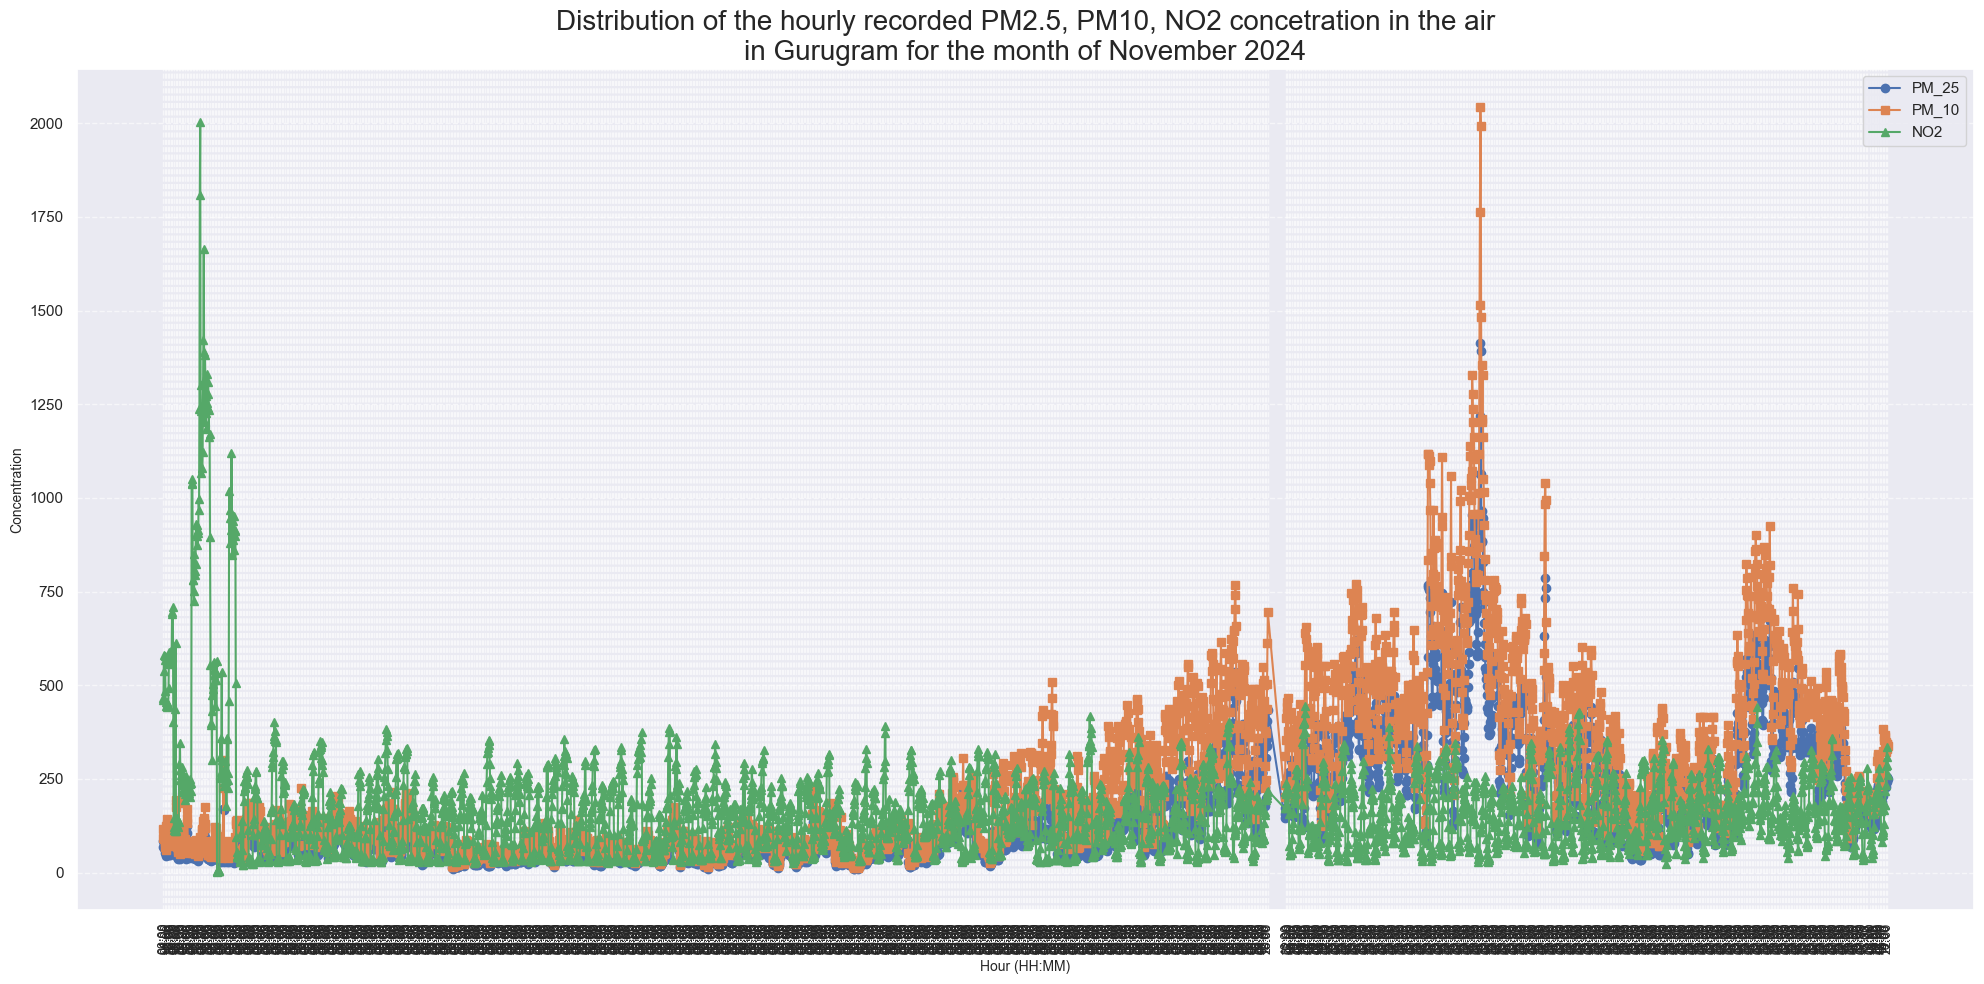

In [10]:
from turtle import color
from pyparsing import line


plt.figure(figsize=(20,10))


data.set_index('hour', inplace=True)
data.index = pd.to_datetime(data.index)

plt.plot(data.index, data['PM_25'], label='PM_25', marker='o')
plt.plot(data.index, data['PM_10'], label='PM_10', marker='s')
plt.plot(data.index, data['NO2'], label='NO2', marker='^')

plt.title('Distribution of the hourly recorded PM2.5, PM10, NO2 concetration in the air\nin Gurugram for the month of November 2024', fontsize=20)

# Set x-axis labels using hours
plt.xticks(ticks=data.index[0::4], 
           labels=data.index[0::4].strftime('%H:%M'), 
           rotation=90, fontsize=9)

plt.xlabel("Hour (HH:MM)", fontsize=10)
plt.ylabel('Concentration', fontsize=10)

# plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



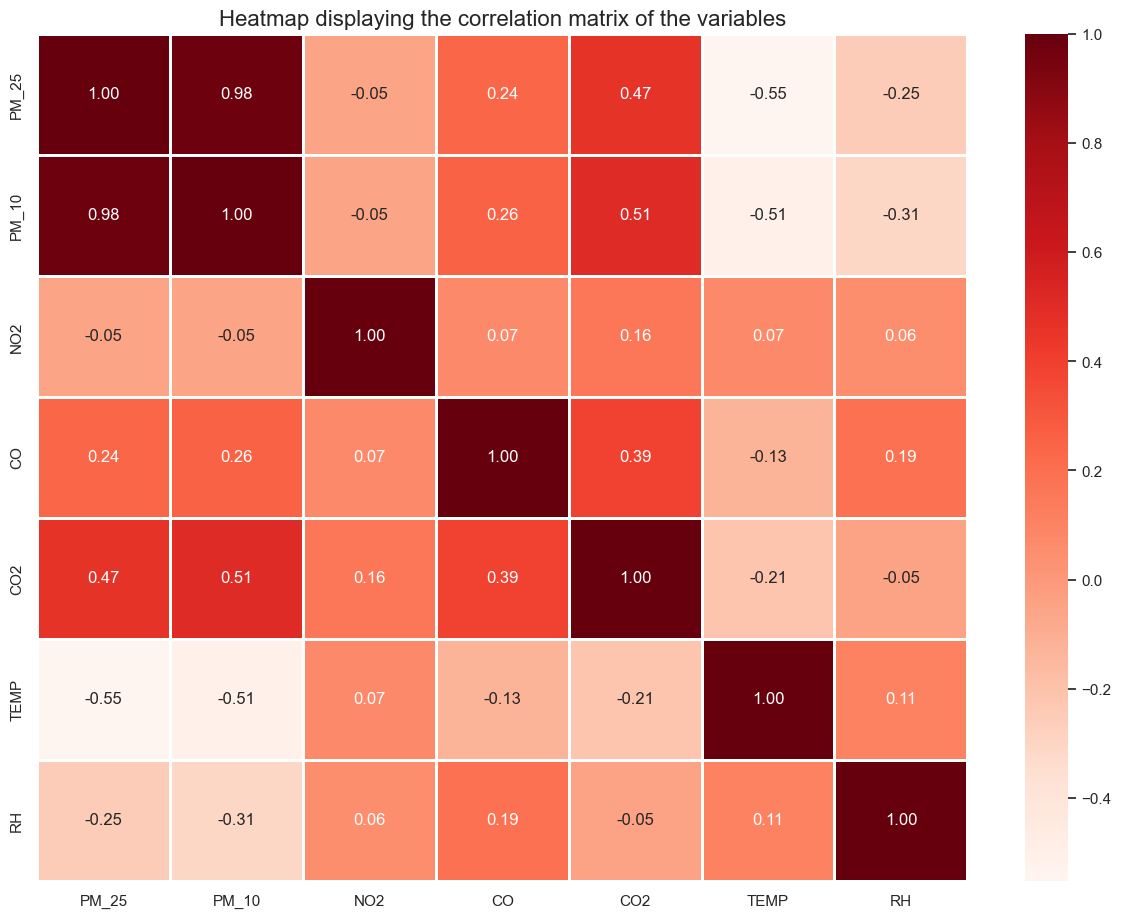

In [11]:
# let's try and visualize the relationships between the features of the data
# Select relevant features for correlation
correlation_data = data[['PM_25', 'PM_10', 'NO2', 'CO', 'CO2', 'TEMP', 'RH']]

# Set figure size
plt.figure(figsize=(15, 11))

# Plot heatmap
sns.heatmap(correlation_data.corr(), cmap=plt.cm.Reds, annot=True, fmt=".2f", linewidths=1)

# Title
plt.title('Heatmap displaying the correlation matrix of the variables', fontsize=16)

# Show plot
plt.show()

### **Model Training and Evaluation**

### **Stats Model**

In [12]:
cons_data2 = sm.tools.add_constant(correlation_data)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const    130.072640
PM_25     33.647815
PM_10     35.451704
NO2        1.053437
CO         1.301175
CO2        1.618581
TEMP       1.489777
RH         1.346086
dtype: float64

In [13]:
correlation_data.columns = ['PM_25', 'PM_10', 'NO2', 'CO', 'CO2', 'TEMP', 'RH']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
correlation_data['PM_25'] = np.log(correlation_data['PM_25'])

In [14]:
mul_reg = formula.ols(formula='PM_25 ~ PM_10 + NO2 + CO + CO2 + TEMP + RH',
                      data=correlation_data).fit()
mul_reg.summary()

# Save regression summary to CSV
summary_df = pd.DataFrame({
    'Variable': mul_reg.params.index,
    'Coefficient': mul_reg.params.values,
    'Std Error': mul_reg.bse.values,
    't-value': mul_reg.tvalues.values, 
    'P-value': mul_reg.pvalues.values
})

summary_df.to_csv('../results/regression_summary.csv', index=True)

In [15]:
# we split the data into predictor variables and Outcome variable
X = correlation_data.drop('PM_25',axis=1)
y = correlation_data['PM_25']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM_10,NO2,CO,CO2,TEMP,RH
0,-0.672841,1.974596,0.062881,1.061330,0.937054,0.825733
1,-0.562879,2.009025,-0.131445,1.197335,0.934342,0.844777
2,-0.688375,2.777242,-0.228061,1.243823,0.901103,0.838183
3,-0.597479,2.486122,-0.279951,1.010762,0.817382,0.983250
4,-0.672027,2.686257,-0.715744,0.984896,0.784339,0.949166


### **Linear Regression Model**

In [16]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [17]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.8397751215593785

Score on test data: 0.8373320677665087


In [18]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.13117079910171237

Overall model accuracy: 0.8373320677665087


# **Ensemble Methods**

For ensemble methods (DecisionTreeRegressor,RandomForestRegressor,and GradientBoostingRegressor),we include the pressure and rain features and we won't scale the predictor variables,neither would we log transform the outcome variable. At this part, model fitting and hyper-parameter tunning will be done at the same time. Instead of fitting the model with single parameters, we will straight away perform the grid search with multiple values for a parameter and find the best parameters for fitting the model on our data to get a satisfactory accuracy.

In [19]:
# we split the data into predictor variables and Outcome variable
X = correlation_data.drop('PM_25',axis=1)
y = correlation_data['PM_25']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

### **Decision Tree Regressor**

In [21]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [22]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.9767971682023432

Score on test data: 0.9712696147148638

Root Mean Squared Error: 0.15555875347849343

Overall model accuracy: 0.9712696147148638


In [23]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.9888951308754101

Score on test data: 0.9796615609233158

Best parameters found:


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Root Mean Squared Error: 0.13088278837697329

Overall model accuracy: 0.9796615609233158


### **Random Forest Regressor**

In [25]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                      min_samples_split=7)

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9908347145034969

Score on test data: 0.9853542493748776

Root Mean Squared Error: 0.11106559483580375

Overall model accuracy: 0.9853542493748776


In [27]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.9827521578260667

Score on test data: 0.9796016595113494

Best parameters found:


{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

Root Mean Squared Error: 0.13107538672684924

Overall model accuracy: 0.9796016595113494


### **Gradient Boosting Regressor**

In [29]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [30]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9985831473754044

Score on test data: 0.9883872462290552

Root Mean Squared Error: 0.09889887198823509

Overall model accuracy: 0.9883872462290552


In [31]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [32]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9985721056938172

Score on test data: 0.9879905328839844

Best parameters found:


{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.2}

Root Mean Squared Error: 0.10057397103366973

Overall model accuracy: 0.9879905328839844


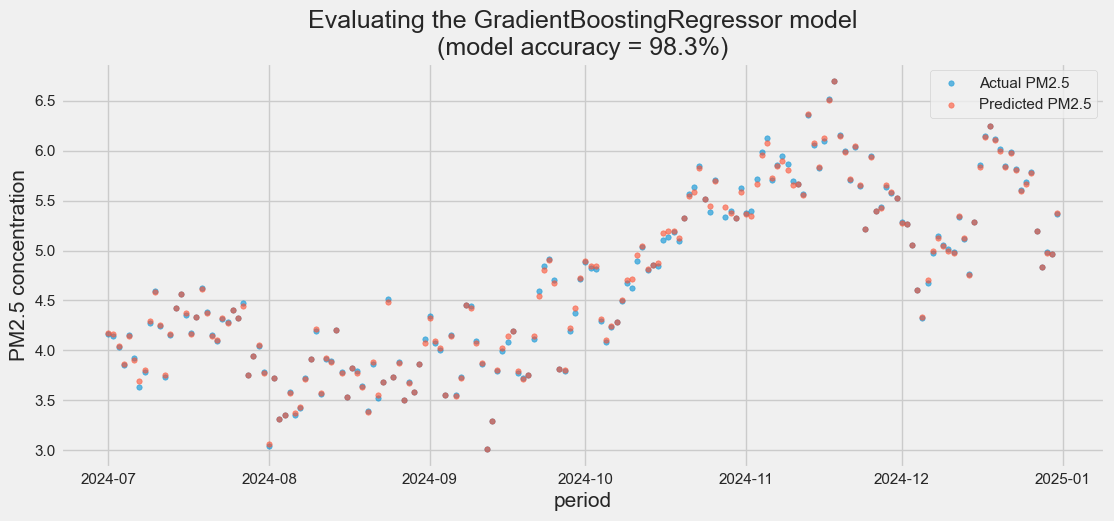

In [33]:
# we now use the best model (GradientBoostingRegressor model) to predict the PM2.5 
# concetration and compare it to the actual PM2.5 recorded in the data by means of
# visualization

compare_data = pd.DataFrame({'dates':data.index,
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)

# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,5))
    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the GradientBoostingRegressor model\n(model accuracy = 98.3%)',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM2.5 concentration',fontsize=15)
    plt.show()

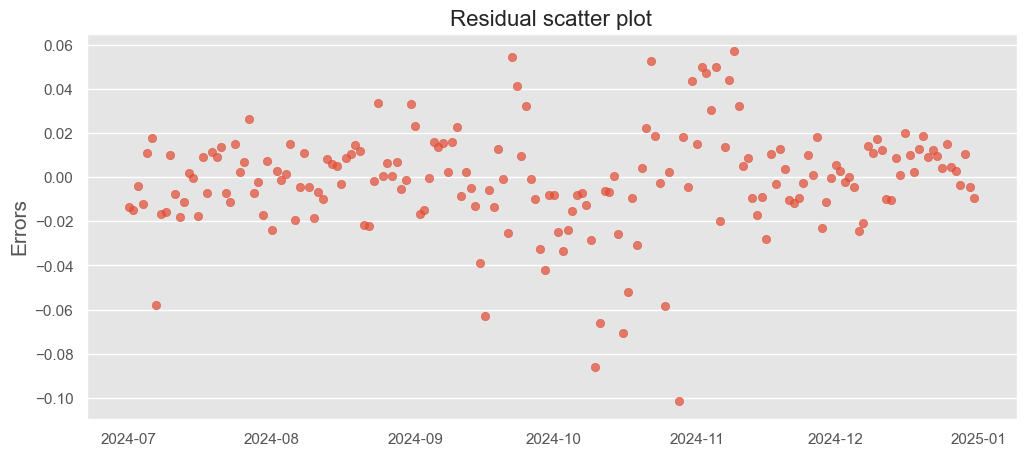

In [34]:
# calculate the errors
compare_data['Residuals'] = compare_data['Actual PM2.5'] - compare_data['Predicted PM2.5']

# make a scatter plot of the errors to see if they follow any pattern
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,5))
    plt.scatter(compare_data.index,compare_data.Residuals,alpha=.7)
    plt.title('Residual scatter plot',fontsize=16)
    plt.ylabel('Errors',fontsize=15)
    plt.grid(axis='x')
    plt.show()

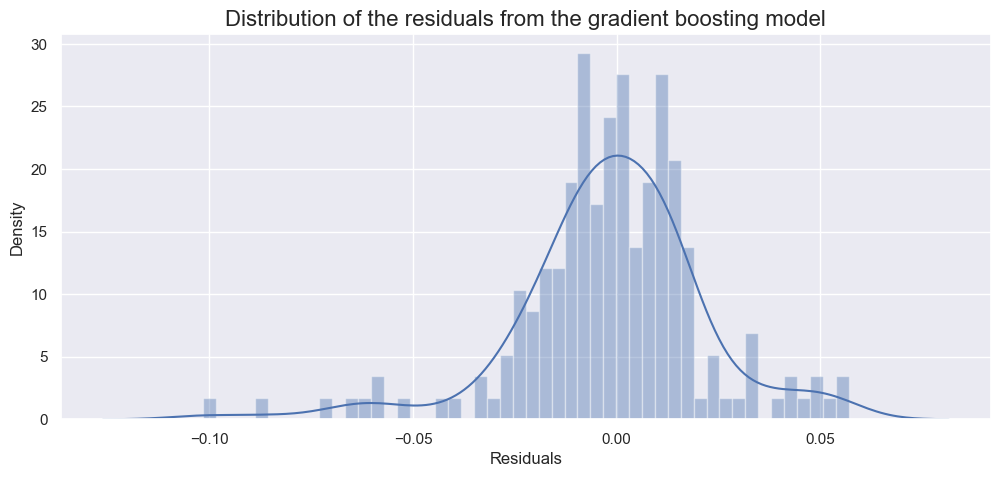

In [35]:
# plot the histogram to see check the normality of the errors
plt.figure(figsize=(12,5))
sns.distplot(compare_data.Residuals,bins=50)
plt.title('Distribution of the residuals from the gradient boosting model',
         fontsize=16)
plt.show()